In [11]:
import sys

import polars as pl
import matplotlib.pyplot as plt

work_path = "/home/haselab/Documents/tat/Research/"
sys.path.append(f"{work_path}app/torch_libs/")

from run_manager import RunManager, RunsManager, RunViewer



In [34]:
rv = RunViewer(exp_path="/home/haselab/Documents/tat/Research/app/ai-step2/exp_tl_test")
rv.write_stats()

df_stats = rv.fetch_stats()
df_stats_ext = df_stats
df_stats_ext = df_stats.filter((pl.col("run_id").is_in([1, 0, 6, 7, 8])))
# df_stats_ext = df_stats.filter((pl.col("run_id") == 8) | (pl.col("run_id") == 15))
# df_stats_ext = df_stats.filter((pl.col("fils") == 1) & (pl.col("num_data") == 10000))

run_ids = df_stats_ext["run_id"]
df_mets = rv.fetch_metrics()
df_agg = df_mets.group_by(by="run_id", maintain_order=True).agg(pl.all())
df_agg = df_agg.filter((pl.col("run_id").is_in(run_ids)))

display(df_agg)

run_id,step,lr,epoch,train_loss,train_acc,train_f1,val_loss,val_acc,val_f1
i32,list[i64],list[f64],list[i64],list[f64],list[f64],list[f64],list[f64],list[f64],list[f64]
0,"[1, 2, … 200]","[0.001, 0.001, … 6.1684e-8]","[1, 2, … 200]","[1.723699, 1.474489, … 1.074877]","[0.30006, 0.499645, … 0.715603]","[0.250007, 0.279227, … 0.33707]","[2.310278, 3.668992, … 3.620054]","[0.52717, 0.699943, … 0.797391]","[0.336441, 0.352453, … 0.3893]"
1,"[1, 2, … 200]","[0.003, 0.003, … 1.8505e-7]","[1, 2, … 200]","[1.563662, 1.701499, … 1.141725]","[0.424113, 0.528928, … 0.701217]","[0.275741, 0.276841, … 0.328344]","[2.071607, 3.546283, … 5.093066]","[0.733296, 0.449801, … 0.817357]","[0.369564, 0.340782, … 0.403764]"
6,"[1, 2, … 200]","[0.0001, 0.0001, … 6.1684e-9]","[1, 2, … 200]","[1.955022, 1.792814, … 1.107234]","[0.193769, 0.265273, … 0.717618]","[0.177348, 0.225605, … 0.337801]","[1.845407, 2.425982, … 1.815327]","[0.282927, 0.380715, … 0.802496]","[0.260541, 0.298276, … 0.392342]"
7,"[1, 2, … 200]","[0.0003, 0.0003, … 1.8505e-8]","[1, 2, … 200]","[1.822921, 1.56991, … 1.079304]","[0.229038, 0.392816, … 0.714355]","[0.209393, 0.259802, … 0.336048]","[1.901201, 1.634852, … 1.913909]","[0.484061, 0.568349, … 0.809302]","[0.303423, 0.330638, … 0.399991]"
8,"[1, 2, … 200]","[0.001, 0.001, … 6.1684e-8]","[1, 2, … 200]","[2.003255, 1.458672, … 1.095868]","[0.261187, 0.508981, … 0.706013]","[0.237726, 0.279323, … 0.34467]","[2.029753, 1.956432, … 7.525338]","[0.393307, 0.691548, … 0.795576]","[0.312024, 0.333647, … 0.401083]"


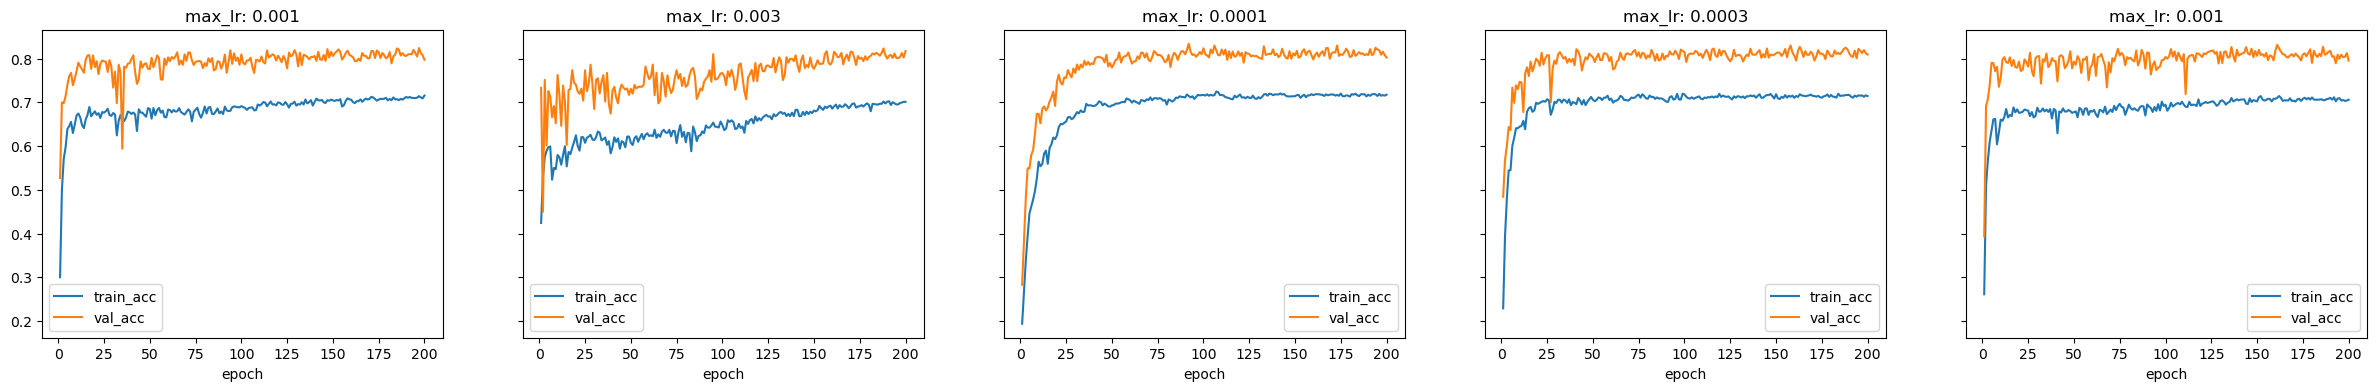

In [42]:
x_col = "epoch"
# y_cols = ["train_loss", "val_loss"]
y_cols = ["train_acc", "val_acc"]
title = "max_lr"


fig, ax = plt.subplots(nrows=1, ncols=len(df_agg), squeeze=False, sharey=True)
plt.subplots_adjust(hspace=0.3)
fig.set_figwidth(6 * len(df_agg))
fig.set_figheight(4 * 1)

for i, df_row in enumerate(df_agg.iter_rows(named=True)):
    ax[0][i].set_xlabel(x_col)
    ax[0][i].set_title(f'{title}: {df_stats.filter(pl.col("run_id") == df_row["run_id"])[title][0]}')
    for y_col in y_cols:
        x = pl.Series(df_row[x_col])
        y = pl.Series(df_row[y_col]).rolling_mean(window_size=1, min_periods=0)
        label = y_col

        ax[0][i].plot(x, y, label=label)
    ax[0][i].legend()






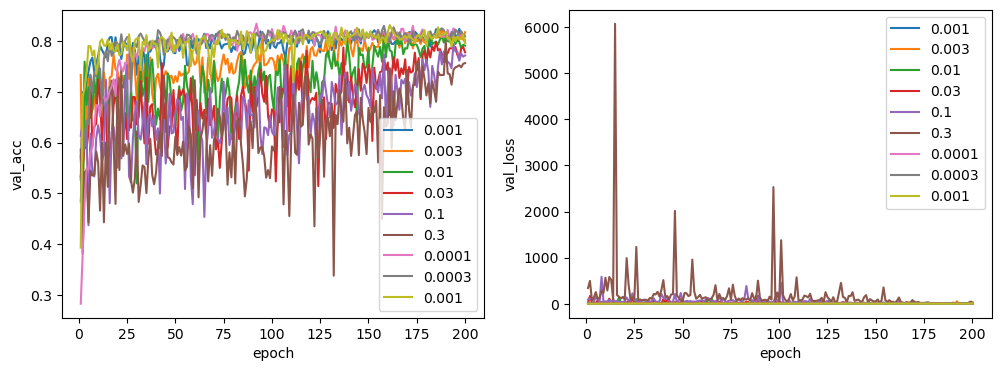

In [29]:
x_col = "epoch"
y_cols = ["val_acc", "val_loss"]
label_col = "max_lr"

fig, ax = plt.subplots(nrows=1, ncols=len(y_cols), squeeze=False, sharey=False)
plt.subplots_adjust(hspace=0.3)
fig.set_figwidth(6 * len(y_cols))
fig.set_figheight(4 * 1)

for i, y_col in enumerate(y_cols):
    ax[0][i].set_xlabel(x_col)
    ax[0][i].set_ylabel(y_col)
    for df_row in df_agg.iter_rows(named=True):
        x = pl.Series(df_row[x_col])
        y = pl.Series(df_row[y_col]).rolling_mean(window_size=1, min_periods=0)
        label = df_stats.filter(pl.col("run_id") == df_row["run_id"])[label_col][0]

        ax[0][i].plot(x, y, label=label)

    ax[0][i].legend()



